Bay Area Bike Share is the region’s bike sharing system with 700 bikes and 70 stations across the region, with locations in California. It is a company that provides Bay Area residents and visitors with an additional transportation option for getting around the region. 
Users have the access to pick up and drop the bike from and to any station irrespective of where it was picked from. There are two ways in which users pay for this service. 
1.	By getting a yearly subscription – Subscribers 
2.	By purchasing a 3-day or 24-hours pass – Customers 
There is an overtime fee charge if the trip length exceeds thirty minutes with an option to make unlimited number of trips under thirty minutes.


In [204]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import sqlite3 as lite
from datetime import datetime
import seaborn as sns
%matplotlib inline

In [205]:
def clean_colheaders(df):
    df_columns = []
    for name in df.columns.tolist():
        df.columns.append(name.lstrip())

    df.columns = df_columns

In [207]:
def clean_colheaders(df):
    
    df_columns = []
    for name in df.columns.tolist():
        df_columns.append(name.lstrip())
        
    #df.columns = [name.lstrip() for name in df.columns.tolist()]
    df.columns = [name.rstrip() for name in df.columns.tolist()]
    df.columns = [name.replace(' ','') for name in df.columns.tolist()]    
    df.columns = [name.replace('_','') for name in df.columns.tolist()]    
    df.columns = [clean_camelcase(name) for name in df.columns.tolist()]
    return df



In [206]:
def clean_camelcase(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1)

In [208]:
df_weather = pd.read_csv("201608_weather_data.csv", nrows=None)
df_station = pd.read_csv("201608_station_data.csv", nrows=None)
df_trip = pd.read_csv("201608_trip_data.csv", nrows=None)

In [209]:
dfs = [df_weather,df_station,df_trip]
for idx,df in enumerate(dfs):
    dfs[idx] = clean_colheaders(dfs[idx])

In [46]:
df_trip.head()

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike#,Subscriber_Type,Zip_Code
0,913465,746,9/1/2015 0:10,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107
1,913466,969,9/1/2015 0:15,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133
2,913467,233,9/1/2015 0:15,Davis at Jackson,42,9/1/2015 0:19,Commercial at Montgomery,45,534,Subscriber,94111
3,913468,213,9/1/2015 1:29,Clay at Battery,41,9/1/2015 1:32,Steuart at Market,74,312,Subscriber,94107
4,913469,574,9/1/2015 1:33,Steuart at Market,74,9/1/2015 1:42,San Francisco Caltrain 2 (330 Townsend),69,279,Subscriber,94107


In [47]:
df_trip = df_trip.rename(columns = {"Subscriber_Type": "Subscription_Type"})
df_weather = df_weather.rename(columns = {'ZIP' : 'Pincode'})
df_trip = df_trip.rename(columns = {'Bike#' : 'BikeNumber'})
df_weather = df_weather.rename(columns = {'PDT' : 'Date'})

In [48]:
df_trip.head()

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,BikeNumber,Subscription_Type,Zip_Code
0,913465,746,9/1/2015 0:10,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107
1,913466,969,9/1/2015 0:15,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133
2,913467,233,9/1/2015 0:15,Davis at Jackson,42,9/1/2015 0:19,Commercial at Montgomery,45,534,Subscriber,94111
3,913468,213,9/1/2015 1:29,Clay at Battery,41,9/1/2015 1:32,Steuart at Market,74,312,Subscriber,94107
4,913469,574,9/1/2015 1:33,Steuart at Market,74,9/1/2015 1:42,San Francisco Caltrain 2 (330 Townsend),69,279,Subscriber,94107


In [210]:
# Remove outliers. Outliers defined as values greater than 99.5th percentile
deviation = np.percentile(df_trip['Duration'],99.5)
df_trip = df_trip[df_trip['Duration'] <= deviation]

In [211]:
df_trip['Depart_hour'] = df_trip['Start_Date'].map(lambda x:(datetime.strptime(x, "%m/%d/%Y %H:%M")).hour)

/Users/sjain/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [212]:
df_trip['Depart_month'] = df_trip['Start_Date'].map(lambda x:(datetime.strptime(x, "%m/%d/%Y %H:%M")).month)

/Users/sjain/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [213]:
df_trip['Depart_day'] = df_trip['Start_Date'].map(lambda x:(datetime.strptime(x, "%m/%d/%Y %H:%M")).day)

/Users/sjain/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [217]:
df_trip.to_csv('df_trip.csv')
df_weather.to_csv('df_weather.csv')
df_station.to_csv('df_station.csv')

In [53]:
# Create SQL table
def create_table(df,table_name,con):
    df.to_sql(table_name,con,if_exists='replace')
    return 1

In [58]:
table_names = ["weather_detail","station_detail","trip_detail"]
dfs = [df_weather,df_station,df_trip,]
con = lite.connect("sfo_bike_latest_new.db")    
    
for idx,df in enumerate(dfs):
    create_table(df,table_names[idx],con)

In [59]:
read_from_sql = True

In [60]:
df_trip.head()

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,BikeNumber,Subscription_Type,Zip_Code,Depart_hour,Depart_month,Depart_day
0,913465,746,9/1/2015 0:10,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107,0,9,1
1,913466,969,9/1/2015 0:15,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133,0,9,1
2,913467,233,9/1/2015 0:15,Davis at Jackson,42,9/1/2015 0:19,Commercial at Montgomery,45,534,Subscriber,94111,0,9,1
3,913468,213,9/1/2015 1:29,Clay at Battery,41,9/1/2015 1:32,Steuart at Market,74,312,Subscriber,94107,1,9,1
4,913469,574,9/1/2015 1:33,Steuart at Market,74,9/1/2015 1:42,San Francisco Caltrain 2 (330 Townsend),69,279,Subscriber,94107,1,9,1


In [172]:
if read_from_sql == True:
    con = lite.connect("sfo_bike_latest_new.db")

    query_weat  = '''
            SELECT stationid , bikesavailable , docksavailable, time
            FROM weather_detail
            '''
    query_stn = '''
            SELECT stationid , lat , long , dockcount, landmark
            FROM station_detail;
            '''
    query_trip = '''
            SELECT Trip_ID , Duration , Start_Terminal,Start_Station, Start_Date, 
                   End_Terminal , End_Station, Subscription_Type , 
                   Zip_Code , Depart_day , Depart_month , Depart_hour
            FROM trip_detail;
            '''
    

    df_station = pd.read_sql_query(query_stn, con, index_col=None, coerce_float=True, \
                           params=None, parse_dates=None, chunksize=None)
    
    
    df_trip = pd.read_sql_query(query_trip, con, index_col=None, coerce_float=True, \
                           params=None, parse_dates=None, chunksize=None)
else:
    
    # Only a subsets of the data frames are sufficient for our analysis
    df_trip = df_trip[['Trip_ID','Duration','Start_Terminal','End_Terminal','End_Station','Subscription_Type','Zip_Code','Depart_day','Depart_month','Depart_hour']]
    df_station = df_station[['station_id','lat','long','dockcount']]

In [173]:
df_weather['Day'] = df_weather['Date'].map(lambda x:(datetime.strptime(x, "%m/%d/%Y")).day)
df_weather['Day'] = df_weather['Date'].map(lambda x:(datetime.strptime(x, "%m/%d/%Y")).month)

In [174]:
df_trip['WeekDays'] = df_trip['Start_Date'].map(lambda x:(datetime.strptime(x, "%m/%d/%Y %H:%M")).weekday())

In [180]:
def get_distance(lat1, lon1, lat2, lon2):

    lon1 = lon1*np.pi/180
    lon2 = lon2*np.pi/180
    lat2 = lat2*np.pi/180
    lat1 = lat1*np.pi/180

    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    
    R = 3961 # miles
    a = (np.sin(dlat/2))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlon/2))**2 
    c = 2 * np.arctan2( np.sqrt(a), np.sqrt(1-a) ) 
    d = R * c
    return d


df_trip = pd.merge(df_trip.rename(columns = {'Start_Terminal': 'stationid'}),
                   stn_df[['lat','long','stationid']], \
                   how = 'left', on=['stationid'])
df_trip = df_trip.drop_duplicates()


df_trip = pd.merge(df_trip.rename(columns = {'lat':'Start_lat','long' : 'Start_long','stationid': 'Start_Terminal',
                                   'End_Terminal': 'stationid'})
                   ,stn_df[['lat','long','stationid']], \
                    how = 'left', on=['stationid'])
df_trip = df_trip.drop_duplicates()

df_trip = df_trip.rename(columns = {'stationid': 'End_Terminal','lat':'End_lat','long' : 'End_long'})

df_trip['Distance'] = get_distance(df_trip['Start_lat'], df_trip['Start_long'], df_trip['End_lat'],
                                           df_trip['End_long'])


In [181]:
# Defining a color pattern based on Tableau's color code
colorcode = [(31, 119, 180), (255, 127, 14),\
             (44, 160, 44), (214, 39, 40), \
             (148, 103, 189),  (140, 86, 75), \
             (227, 119, 194), (127, 127, 127), \
             (188, 189, 34), (23, 190, 207)]

for i in range(len(colorcode)):  
    r, g, b = colorcode[i]  
    colorcode[i] = (r / 255., g / 255., b / 255.)

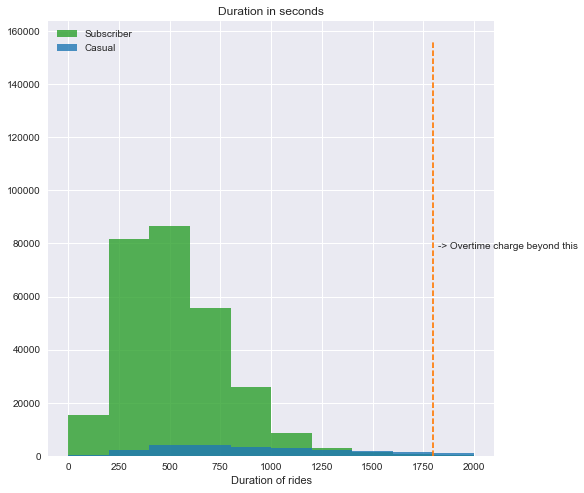

In [182]:
plt.figure(figsize = [8,8])
h = plt.hist(df_trip[df_trip['Subscription_Type'] == 'Subscriber']['Duration'].values,\
             range = [0,2000],color = colorcode[2],alpha = .8, label = 'Subscriber')

plt.plot([1800,1800],[0,float(df_trip.shape[0]/2)],color = colorcode[1],linestyle = '--')
plt.text(1820,float(df_trip.shape[0]/4),'-> Overtime charge beyond this')

h = plt.hist(df_trip[df_trip['Subscription_Type'] == 'Customer']['Duration'].values,\
             range = [0,2000],color = colorcode[0],alpha = .8, label = 'Casual')
plt.title('Duration in seconds')
plt.xlabel('Duration of rides')
plt.legend()

In [183]:
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

Peak hour for Day 0 happens at 800 hours
Peak hour for Day 1 happens at 800 hours
Peak hour for Day 2 happens at 800 hours
Peak hour for Day 3 happens at 800 hours
Peak hour for Day 4 happens at 800 hours
Peak hour for Day 5 happens at 1300 hours
Peak hour for Day 6 happens at 1400 hours
Peak hour for Day 0 happens at 1600 hours
Peak hour for Day 1 happens at 1600 hours
Peak hour for Day 2 happens at 1700 hours
Peak hour for Day 3 happens at 1700 hours
Peak hour for Day 4 happens at 1700 hours
Peak hour for Day 5 happens at 1300 hours
Peak hour for Day 6 happens at 1300 hours


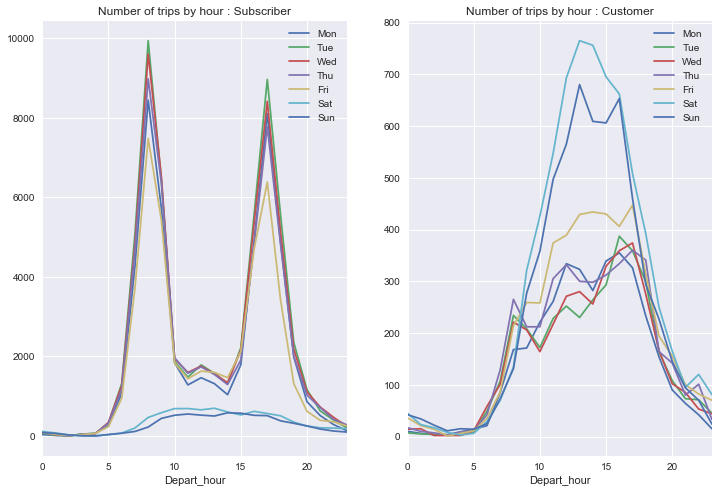

In [184]:
fig,axes = plt.subplots(figsize=(12, 8), nrows=1, ncols=2)

a = df_trip[df_trip['Subscription_Type'] == 'Subscriber'].groupby(['WeekDays','Depart_hour'])['Trip_ID'].count()

plt.sca(axes[0])

for i in range(7):
    x = a[i].plot(label = days[i])
    print('Peak hour for Day {0} happens at {1}00 hours'.format(i,np.argmax(a[i])))
plt.title('Number of trips by hour : Subscriber')    
plt.legend()

a = df_trip[df_trip['Subscription_Type'] == 'Customer'].groupby(['WeekDays','Depart_hour'])['Trip_ID'].count()

plt.sca(axes[1])
for i in range(7):
    x = a[i].plot(label = days[i])
    print('Peak hour for Day {0} happens at {1}00 hours'.format(i,np.argmax(a[i])))
plt.title('Number of trips by hour : Customer')    
plt.legend()


In [185]:
overtime = df_trip[(df_trip['Subscription_Type'] == 'Customer') & (df_trip['Duration']>1800)]['Duration'].count()/\
    float(df_trip[(df_trip['Subscription_Type'] == 'Customer')]['Duration'].count())
print("Overtime fee paid by the casual customers = {0}% ".format(np.round(overtime*100,0)))

overtime = df_trip[(df_trip['Subscription_Type'] == 'Subscriber') & (df_trip['Duration']>1800)]['Duration'].count()/\
    float(df_trip[(df_trip['Subscription_Type'] == 'Subscriber')]['Duration'].count())
print("Overtime fee paid by the subscribers = {0}%".format(np.round(overtime*100,0)))

Overtime fee paid by the casual customers = 29.0% 
Overtime fee paid by the subscribers = 0.0%


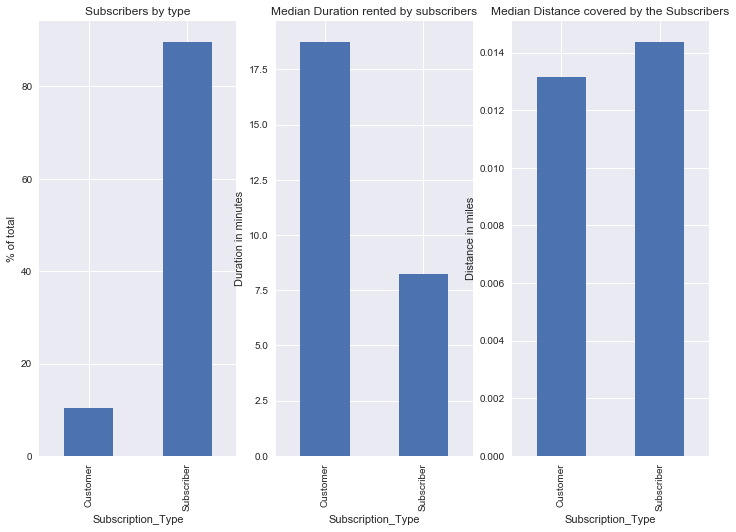

In [186]:
# Understanding How Metrics are different based on Subscription Type
subscrib_dur = df_trip.groupby('Subscription_Type')['Duration'].median()/60
dur_count = df_trip.groupby('Subscription_Type')['Duration'].count()
subscrip_dis = df_trip.groupby('Subscription_Type')['Distance'].median()/60

fig,axes = plt.subplots(figsize=(12, 8), nrows=1, ncols=3)
plt.sca(axes[0])
dur_count = dur_count/np.sum(dur_count.values)*100
dur_count.plot(kind = 'bar')
plt.ylabel('% of total')
plt.title('Subscribers by type')
plt.sca(axes[1])
subscrib_dur.plot(kind = 'bar')
plt.ylabel('Duration in minutes')
plt.title('Median Duration rented by subscribers')
plt.sca(axes[2])
subscrip_dis.plot(kind = 'bar')
plt.ylabel('Distance in miles')
plt.title('Median Distance covered by the Subscribers')

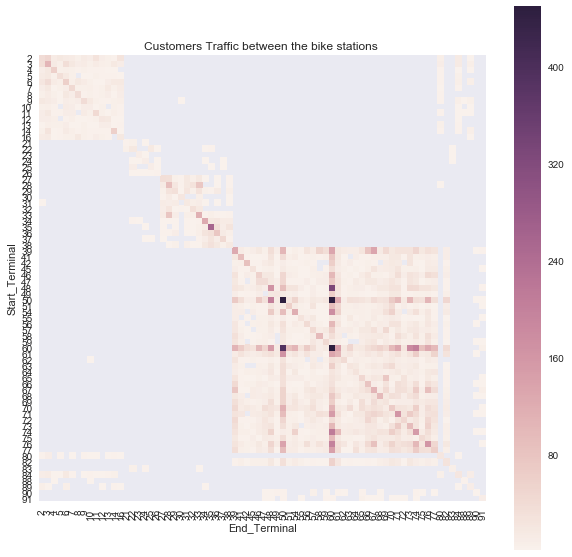

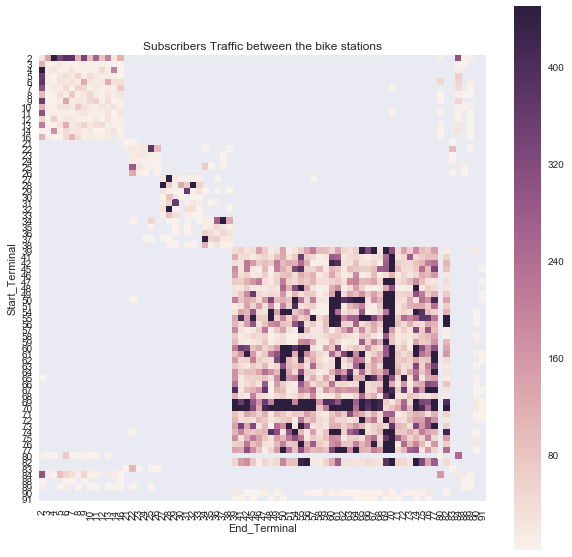

In [187]:
# Examining traffic between stations

endStationCountCust  = df_trip[df_trip['Subscription_Type'] == 'Customer'].groupby(['Start_Terminal','End_Terminal'])['Trip_ID'].count().unstack()
plt.figure(figsize = (10,10))
h = sns.heatmap(endStationCountCust ,linewidths=0, square=True , vmax=450)
h = plt.xticks(rotation='vertical')
h= plt.yticks(rotation='horizontal')
plt.title('Customers Traffic between the bike stations ')
plt.savefig('StationUsage_customers.png')

endStationCountSub  = df_trip[df_trip['Subscription_Type'] == 'Subscriber'].groupby(['Start_Terminal','End_Terminal'])['Trip_ID'].count().unstack()
plt.figure(figsize = (10,10))
h = sns.heatmap(endStationCountSub ,linewidths=0, square=True , vmax=450)
h = plt.xticks(rotation='vertical')
h= plt.yticks(rotation='horizontal')
plt.title('Subscribers Traffic between the bike stations')
plt.savefig('StationUsage_subscribers.png')


# Analysis 4

In [191]:
def usage_plot(data, key = '', filters = [], **kwargs):
    
    # Apply filters to data
    for condition in filters:
        data = filter_data(data, condition)

    # Create plotting figure
    plt.figure(figsize=(8,6))

    if isinstance(data[key][0] , str): # Categorical features
        # For strings, collect unique strings and then count number of
        # outcomes for survival and non-survival.
        
        # Summarize dataframe to get counts in each group
        data['count'] = 1
        data = data.groupby(key, as_index = False).count()
        
        levels = data[key].unique()
        n_levels = len(levels)
        bar_width = 0.8
        
        for i in range(n_levels):
            trips_bar = plt.bar(i - bar_width/2, data.loc[i]['count'], width = bar_width)
        
        # add labels to ticks for each group of bars.
        plt.xticks(range(n_levels), levels)
        
    else: # Numeric features
        # For numbers, divide the range of data into bins and count
        # number of outcomes for survival and non-survival in each bin.
        
        # Set up bin boundaries for plotting
        if kwargs and 'n_bins' in kwargs and 'bin_width' in kwargs:
            raise Exception("Arguments 'n_bins' and 'bin_width' cannot be used simultaneously.")

        min_value = data[key].min()
        max_value = data[key].max()
        value_range = max_value - min_value
        n_bins = 10
        bin_width = float(value_range) / n_bins

        bins = [i*bin_width + min_value for i in range(n_bins+1)]
        
        # plot the data
        plt.hist(data[key], bins = bins)

    # Common attributes for plot formatting
    key_name = ' '.join([x.capitalize() for x in key.split('_')])
    plt.xlabel(key_name)
    plt.ylabel("Number of Trips")
    plt.title("Number of Trips by {:s}".format(key_name))
    plt.show()

In [189]:
def usage_stats(data, filters = [], verbose = True):
    """
    Report number of trips and average trip duration for data points that meet
    specified filtering criteria.
    """

    n_data_all = data.shape[0]

    # Apply filters to data
    for condition in filters:
        data = filter_data(data, condition)

    # Compute number of data points that met the filter criteria.
    n_data = data.shape[0]

    # Compute statistics for trip durations.
    duration_mean = data['Duration'].mean()
    duration_qtiles = data['Duration'].quantile([.25, .5, .75]).as_matrix()
    
    # Report computed statistics if verbosity is set to True (default).
    if verbose:
        if filters:
            print('There are {:d} data points ({:.2f}%) matching the filter criteria.'.format(n_data, 100. * n_data / n_data_all))
        else:
            print('There are {:d} data points in the dataset.'.format(n_data))

        print('The average duration of trips is {:.2f} minutes.'.format(duration_mean))
        print('The median trip duration is {:.2f} minutes.'.format(duration_qtiles[1]))
        print('25% of trips are shorter than {:.2f} minutes.'.format(duration_qtiles[0]))
        print('25% of trips are longer than {:.2f} minutes.'.format(duration_qtiles[2]))

    # Return three-number summary
    return duration_qtiles

In [190]:
def filter_data(data, condition):

    # Only want to split on first two spaces separating field from operator and
    # operator from value: spaces within value should be retained.
    field, op, value = condition.split(" ", 2)
        # check if field is valid
    if field not in data.columns.values :
        raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(field))

    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")
    

    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    
    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data

The total number of trips made in the first month of operations, along with some statistics regarding how long trips took.

In [192]:
usage_stats(df_trip)

There are 312121 data points in the dataset.
The average duration of trips is 698.95 minutes.
The median trip duration is 518.00 minutes.
25% of trips are shorter than 353.00 minutes.
25% of trips are longer than 731.00 minutes.


array([ 353.,  518.,  731.])

You should see that there are over 27,000 trips in the first month, and that the average trip duration is larger than the median trip duration (the point where 50% of trips are shorter, and 50% are longer). In fact, the mean is larger than the 75% shortest durations. This will be interesting to look at later on.
Let's start looking at how those trips are divided by subscription type. One easy way to build an intuition about the data is to plot it. We'll use the usage_plot() function for this. The second argument of the function allows us to count up the trips across a selected variable, displaying the information in a plot. The expression below will show how many customer and how many subscriber trips were made.

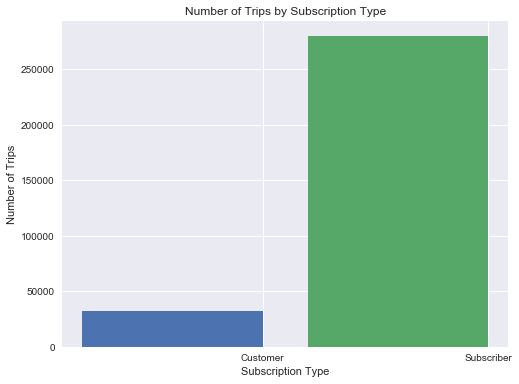

In [193]:
usage_plot(df_trip, 'Subscription_Type')

Seems like there's about 90% more trips made by subscribers in the first month than customers. Let's try a different variable now. What does the distribution of trip durations look like?

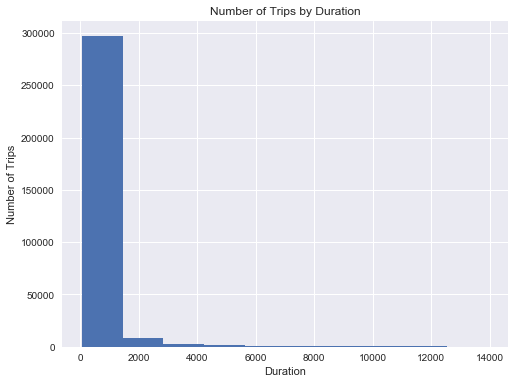

In [194]:
usage_plot(df_trip, 'Duration')


Looks pretty strange, doesn't it? Take a look at the duration values on the x-axis. Most rides are expected to be 30 minutes or less, since there are overage charges for taking extra time in a single trip. The first bar spans durations up to about 1000 minutes, or over 16 hours. Based on the statistics we got out of usage_stats(), we should have expected some trips with very long durations that bring the average to be so much higher than the median: the plot shows this in a dramatic, but unhelpful way.
When exploring the data, you will often need to work with visualization function parameters in order to make the data easier to understand. Here's where the third argument of the usage_plot() function comes in. Filters can be set for data points as a list of conditions. Let's start by limiting things to trips of less than 60 minutes.

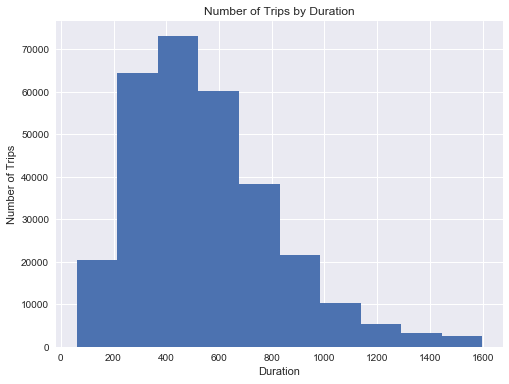

In [199]:
usage_plot(df_trip, 'Duration', ['Duration < 1600'])

This is looking better! You can see that most trips are indeed less than 30 minutes in length, but there's more that you can do to improve the presentation. Since the minimum duration is not 0, the left hand bar is slighly above 0. We want to be able to tell where there is a clear boundary at 30 minutes, so it will look nicer if we have bin sizes and bin boundaries that correspond to some number of minutes. Fortunately, you can use the optional "boundary" and "bin_width" parameters to adjust the plot. By setting "boundary" to 0, one of the bin edges (in this case the left-most bin) will start at 0 rather than the minimum trip duration. And by setting "bin_width" to 5, each bar will count up data points in five-minute intervals.

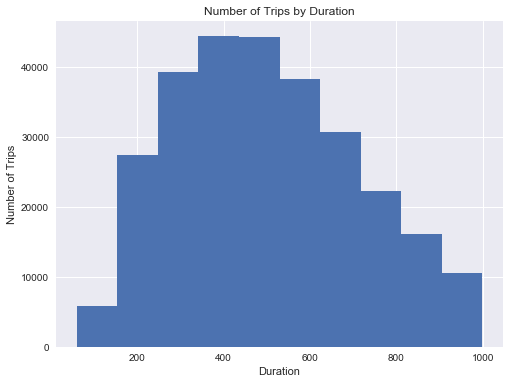

In [203]:
usage_plot(df_trip, 'Duration', ['Duration < 1000'], boundary = 1, bin_width = 1600)

# Analysis 5

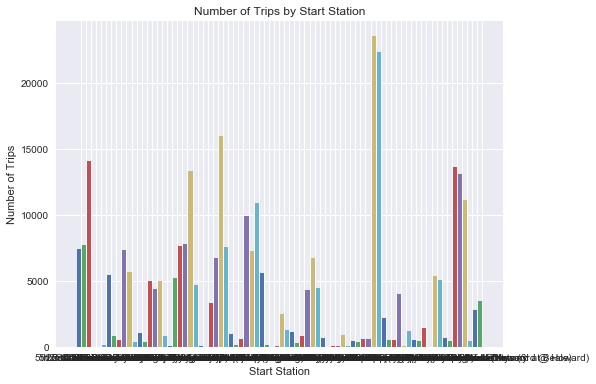

In [197]:
usage_plot(trip_df, 'Start_Station')

In [198]:
usage_plot(trip_df, 'End_Station')

KeyError: 'End_Station'

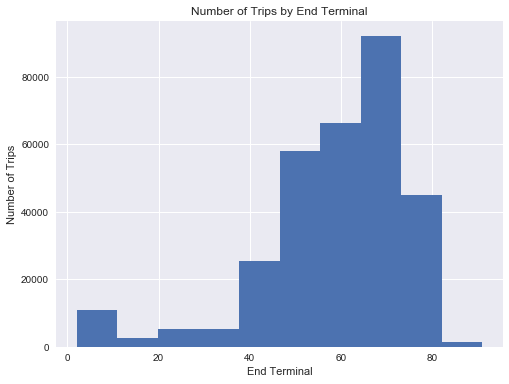

In [175]:
usage_plot(trip_df, 'End_Terminal')

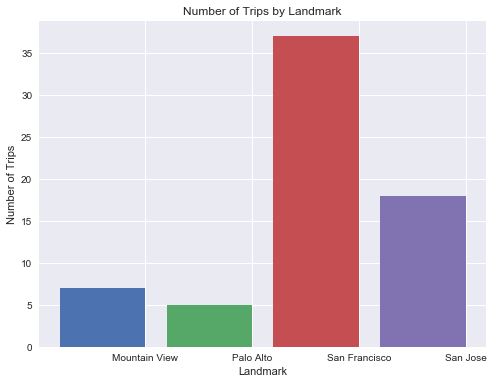

In [160]:
usage_plot(df_station, 'landmark')

In [179]:
# Embark = San Jose
usage_plot(df_trip, 'End_Terminal', ["Start_Terminal == 'San Jose'", "End_Station != 'San Jose'"])

/Users/sjain/anaconda/lib/python3.6/site-packages/pandas/core/ops.py:792: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison